In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
data = open('./data/zulawski-moje-zycie/zulawski-moje-zycie.txt', encoding="utf8").read()

corpus = data.lower().split("\n")

In [4]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [5]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(LSTM(150, return_sequences = True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(total_words, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           104300    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 521)               52621     
_________________________________________________________________
dense_1 (Dense)              (None, 1043)              544446    
Total params: 1,162,967
Trainable params: 1,162,967
Non-trainable params: 0
______________________________________________

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(predictors, label, epochs=200, verbose=2)

Epoch 1/200
45/45 - 2s - loss: 7.8119 - accuracy: 0.0326
Epoch 2/200
45/45 - 2s - loss: 6.8414 - accuracy: 0.0298
Epoch 3/200
45/45 - 2s - loss: 6.5357 - accuracy: 0.0319
Epoch 4/200
45/45 - 2s - loss: 6.2966 - accuracy: 0.0362
Epoch 5/200
45/45 - 2s - loss: 6.0465 - accuracy: 0.0312
Epoch 6/200
45/45 - 2s - loss: 5.9091 - accuracy: 0.0362
Epoch 7/200
45/45 - 2s - loss: 5.8082 - accuracy: 0.0348
Epoch 8/200
45/45 - 2s - loss: 5.7332 - accuracy: 0.0334
Epoch 9/200
45/45 - 2s - loss: 5.6562 - accuracy: 0.0284
Epoch 10/200
45/45 - 2s - loss: 5.5675 - accuracy: 0.0390
Epoch 11/200
45/45 - 2s - loss: 5.4938 - accuracy: 0.0291
Epoch 12/200
45/45 - 2s - loss: 5.4227 - accuracy: 0.0284
Epoch 13/200
45/45 - 2s - loss: 5.3625 - accuracy: 0.0341
Epoch 14/200
45/45 - 2s - loss: 5.2804 - accuracy: 0.0305
Epoch 15/200
45/45 - 2s - loss: 5.1996 - accuracy: 0.0476
Epoch 16/200
45/45 - 2s - loss: 5.0912 - accuracy: 0.0447
Epoch 17/200
45/45 - 2s - loss: 5.0415 - accuracy: 0.0468
Epoch 18/200
45/45 - 2s

Epoch 142/200
45/45 - 2s - loss: 1.1105 - accuracy: 0.8112
Epoch 143/200
45/45 - 2s - loss: 1.0861 - accuracy: 0.8254
Epoch 144/200
45/45 - 2s - loss: 1.0382 - accuracy: 0.8275
Epoch 145/200
45/45 - 2s - loss: 1.0139 - accuracy: 0.8375
Epoch 146/200
45/45 - 2s - loss: 0.9921 - accuracy: 0.8389
Epoch 147/200
45/45 - 2s - loss: 0.9899 - accuracy: 0.8439
Epoch 148/200
45/45 - 2s - loss: 1.0761 - accuracy: 0.8197
Epoch 149/200
45/45 - 2s - loss: 1.0113 - accuracy: 0.8311
Epoch 150/200
45/45 - 2s - loss: 0.9947 - accuracy: 0.8297
Epoch 151/200
45/45 - 2s - loss: 0.9793 - accuracy: 0.8396
Epoch 152/200
45/45 - 2s - loss: 0.9607 - accuracy: 0.8396
Epoch 153/200
45/45 - 2s - loss: 0.9488 - accuracy: 0.8424
Epoch 154/200
45/45 - 2s - loss: 0.9646 - accuracy: 0.8382
Epoch 155/200
45/45 - 2s - loss: 0.9483 - accuracy: 0.8446
Epoch 156/200
45/45 - 2s - loss: 0.9329 - accuracy: 0.8467
Epoch 157/200
45/45 - 2s - loss: 0.9582 - accuracy: 0.8410
Epoch 158/200
45/45 - 2s - loss: 0.9215 - accuracy: 0.84

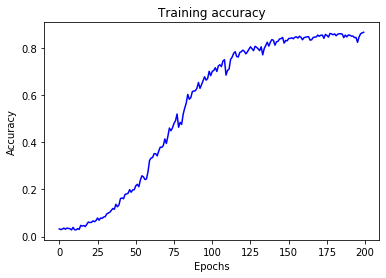

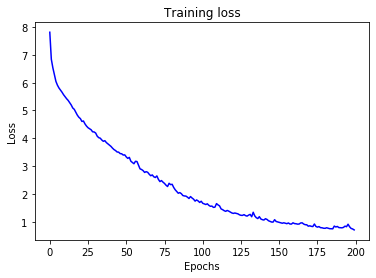

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

# Get the number of epochs
epochs = range(len(acc))

# Plot accuracy per epoch
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training accuracy')

plt.figure()

# Plot loss per epoch
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training loss')

plt.show()

In [10]:
print("tak")

tak


In [11]:
seed_text = "1."
next_words = 150
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [12]:
print(seed_text)

1. się tem prawdziwem prosty i szlachetny w łeb dostali dostali przędzie przędzie stali stali stali stali stali stali pokaże raz tędy tłumie śniły śniły śniły śniły śniły śniły śniły śniły stali nad chmury daj deszcz jedna łza koszulą szyję… stali stali stali stali stali stali już się wszystko gdy tysiąc umiera dla dalej dalej tęskne tęskne przędzie śniły przędzie przędzie śniły przędzie przędzie stali co mu się która nadto szybko chłonę szyję… szyję… szyję… szyję… stali stali stali stali która przędzie przędzie przędzie przędzie przędzie śniły śniły śniły przędzie przędzie śniegem nas na chmury łza czas będzie co drogę już się stali stali uczucia tęskne kuzynki kuzynki przędzie co nie pod kuzynki śniły pod co dalej tęskne przędzie śniły przędzie pod pod już drogę w zawsze przędzie przędzie przędzie przędzie przędzie przędzie przędzie przędzie przędzie długi i nadto szybko żyję oceanów stali stali stali stali stali stali stali dla dwa


In [13]:
seed_text = "1."
next_words = 300
lll = "1."
gg=0
 
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    if (gg==output_word):
        x=0
    else:
        lll += " " + output_word
    gg=output_word

In [14]:
print(lll)

1. się tem prawdziwem prosty i szlachetny w łeb dostali przędzie stali pokaże raz tędy tłumie śniły stali nad chmury daj deszcz jedna łza koszulą szyję… stali już się wszystko gdy tysiąc umiera dla dalej tęskne przędzie śniły przędzie śniły przędzie stali co mu się która nadto szybko chłonę szyję… stali która przędzie śniły przędzie śniegem nas na chmury łza czas będzie co drogę już się stali uczucia tęskne kuzynki przędzie co nie pod kuzynki śniły pod co dalej tęskne przędzie śniły przędzie pod już drogę w zawsze przędzie długi i nadto szybko żyję oceanów stali dla dwa umiera z tysiąc dalej ogień tęskne śniły przędzie śniły stali przędzie śniły pod już nad chmury gra błysk królom dostali przędzie stali już co się imienia umiera mu się zmagam dalej tęskne śniły przędzie tęskne śniły przędzie co potężne nas idzie pod chleba ludźmi w łeb dostali przędzie stali śniły stali pokaże nas nie tysiąc przy chyba do mogiły tęskne śniły przędzie co trzeba śniły już się co przy obecna długi stali d